# A bimodal example
This is a sample to infer the parameters of a bimodal model, which is a mixture of two Normal distribution components.
The data is read from data6.2.1.dat.R, which is from ![Stefano's webpage](http://www.brera.mi.astro.it/%7Eandreon/BayesianMethodsForThePhysicalSciences/)

First of course, import necessary packages.

In [1]:
%matplotlib inline
from mcupy.graph import *
from mcupy.utils import *
from mcupy.nodes import *
from mcupy.jagsparser import *
import scipy
import seaborn
import pylab

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Then read the data from a jags data file

In [2]:
data=parseJagsDataFile('data6.2.1.dat.R')
obsval=data['obsval']
err=data['err']

Then Let's plot the histogram of the data.

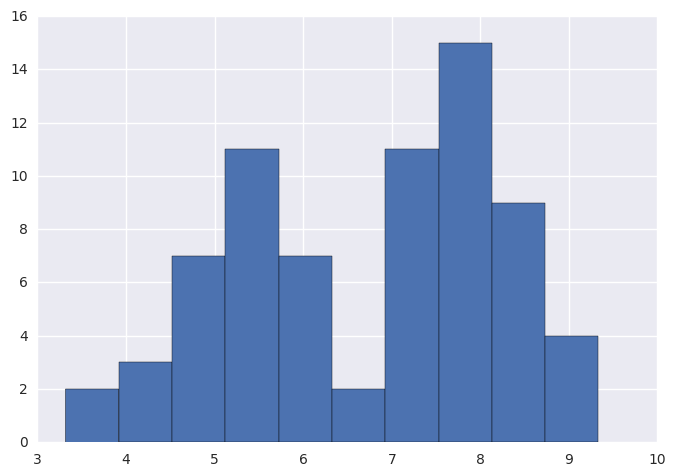

In [3]:
dummy=pylab.hist(obsval,bins=10)

Then compose the Bayesian network

In [4]:
g=Graph()
p=FixedUniformNode(1e-5,1-1e-5).withTag("p")
sig1=FixedUniformNode(1e-10,10).withTag("sig1")
sig2=FixedUniformNode(1e-10,10).withTag("sig2")
cent1=FixedUniformNode(4,10).withTag("cent1")
cent2Upper=ConstNode(10+1e-6).withTag("cent2Upper")
cent2=UniformNode(cent1,cent2Upper).withTag("cent2")
for i in range(0,len(obsval)):
    b=BernNode(p).inGroup("b")
    cent=CondNode(b,cent1,cent2).inGroup("cent")
    sig=CondNode(b,sig1,sig2).inGroup("sig")
    val=NormalNode(cent,sig).inGroup("val")
    obsvalNode=NormalNode(val,ConstNode(err[i])).withObservedValue(obsval[i]).inGroup("obsval")
    g.addNode(obsvalNode)

Show the structure of the graph to check it.

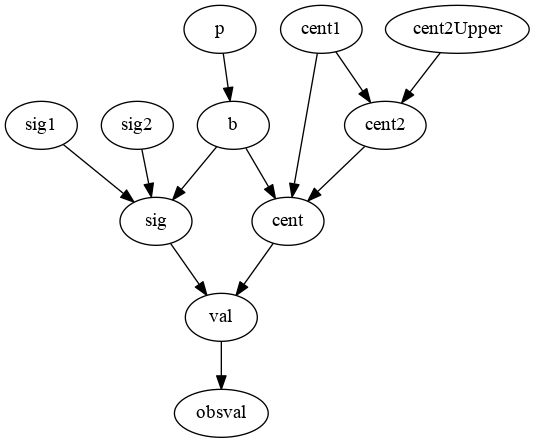

In [5]:
display_graph(g)

Declare some monitors to record the results.

In [6]:
monP=g.getMonitor(p)
monCent1=g.getMonitor(cent1)
monCent2=g.getMonitor(cent2)
monSig1=g.getMonitor(sig1)
monSig2=g.getMonitor(sig2)

Burn 10000 times and sample 10000 times.

In [7]:
results=[]
for i in log_progress(range(0,10000)):
    g.sample()
for i in log_progress(range(0,10000)):
    g.sample()
    results.append([monP.get(),monCent1.get(),monCent2.get(),monSig1.get(),monSig2.get()])
results=scipy.array(results)

Plot the results.

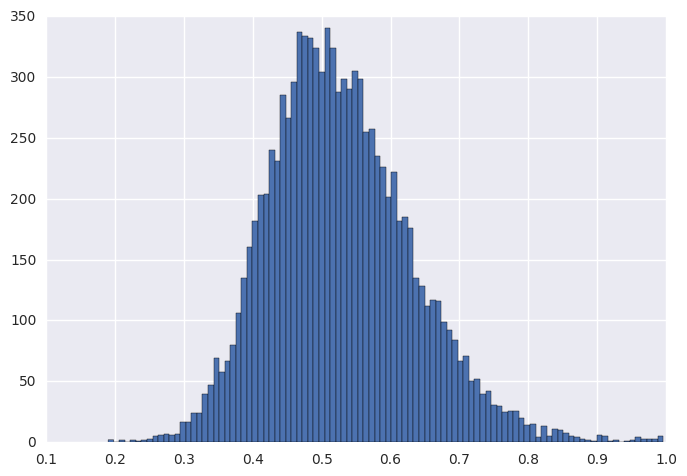

In [8]:
dummy=pylab.hist(results[:,0],bins=100)

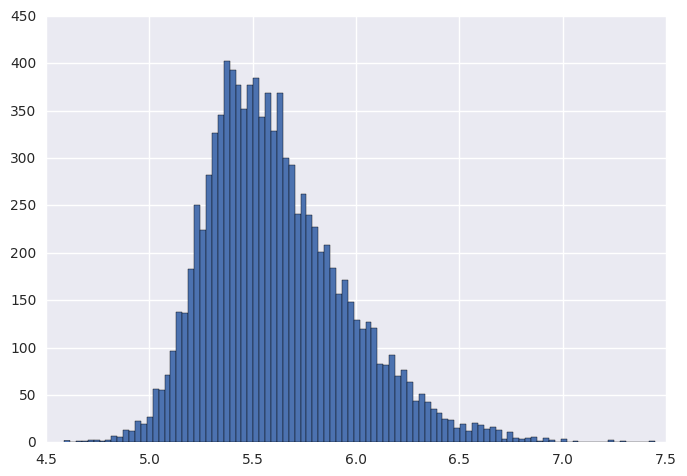

In [9]:
dummy=pylab.hist(results[:,1],bins=100)

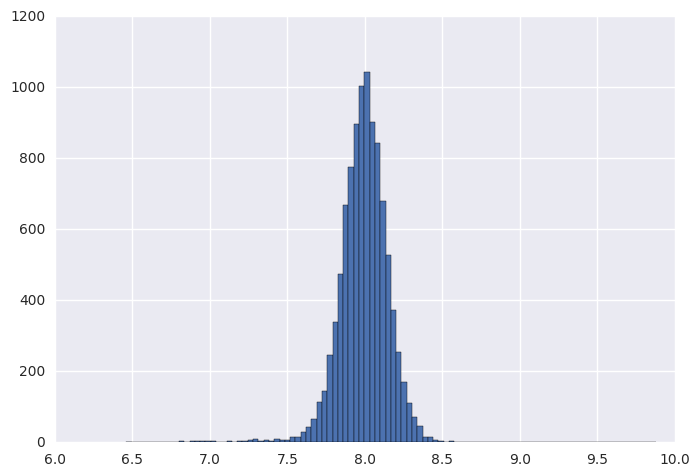

In [10]:
dummy=pylab.hist(results[:,2],bins=100)

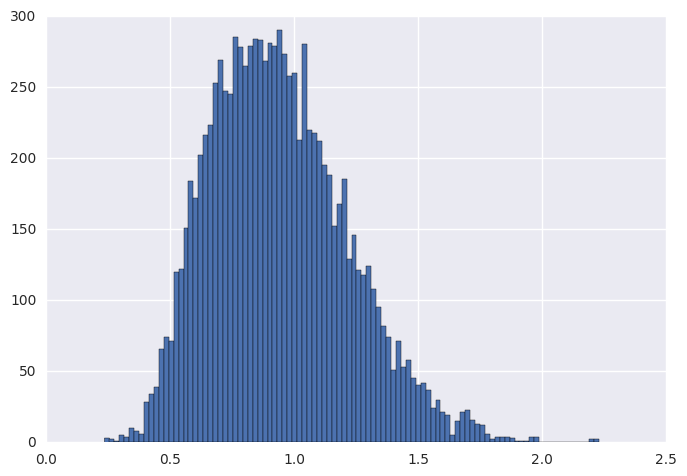

In [11]:
dummy=pylab.hist(results[:,3],bins=100)

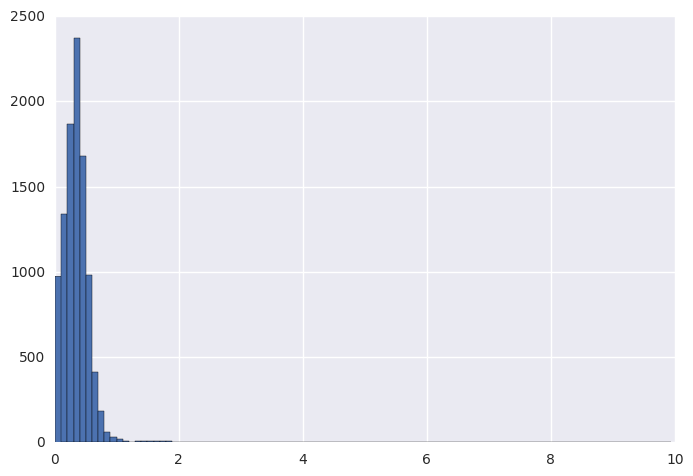

In [12]:
dummy=pylab.hist(results[:,4],bins=100)

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


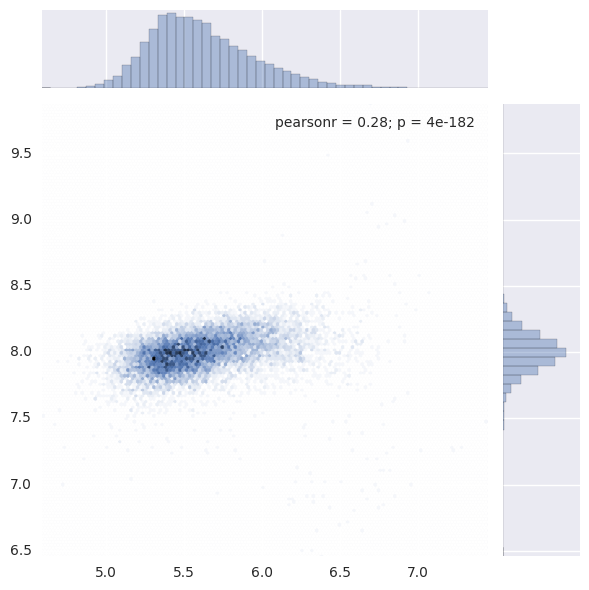

In [13]:
seaborn.jointplot(results[:,1],results[:,2],kind='hex')

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


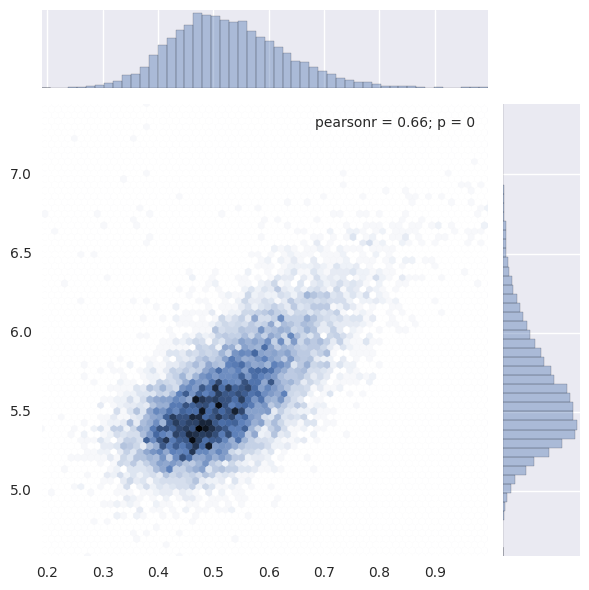

In [14]:
seaborn.jointplot(results[:,0],results[:,1],kind='hex')